In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer


# Data Exploration

In [49]:
df=pd.read_csv('../csv/apartments_db.mubawab.csv')
print(df.head())

                                                 _id gouvernorat  \
0  9640d5dccdfd9b5c4a45e8406c32751838aca9029d66f8...       tunis   
1  8ae77a6b1c36d45ddb78aa7dd34d9cd3a21a89073927ac...       tunis   
2  723d5c50c2ea07db6a21f6805449bab0acccdeb280ef71...       tunis   
3  6e7883ddcf44a125dd34f600fe664891b7b1c75d953d92...       tunis   
4  47643d27c8e43aae55bd07969263224dc09b417bc37030...       tunis   

                          delegation      prix  superficie  nb_pieces  \
0  Les Jardins de Carthage à Le Kram       NaN         125        3.0   
1  Les Jardins de Carthage à Le Kram       NaN         181        4.0   
2  Les Jardins de Carthage à Le Kram       NaN          65        2.0   
3                  Aouina à La Marsa  340000.0          88        3.0   
4       Ain Zaghouan Nord à La Marsa       NaN         121        3.0   

   chambres  salle_de_bains           etat etage       standing  \
0       2.0             2.0  Moins d'un an  2ème  Haut standing   
1       3.0       

**drop unnecessary scraped data**

In [50]:
df.drop(columns=['_id', 'nb_pieces', 'standing', 'description'], inplace=True)

In [51]:
print(df.head())

  gouvernorat                         delegation      prix  superficie  \
0       tunis  Les Jardins de Carthage à Le Kram       NaN         125   
1       tunis  Les Jardins de Carthage à Le Kram       NaN         181   
2       tunis  Les Jardins de Carthage à Le Kram       NaN          65   
3       tunis                  Aouina à La Marsa  340000.0          88   
4       tunis       Ain Zaghouan Nord à La Marsa       NaN         121   

   chambres  salle_de_bains           etat etage  
0       2.0             2.0  Moins d'un an  2ème  
1       3.0             2.0  Moins d'un an   NaN  
2       1.0             1.0        Nouveau   NaN  
3       2.0             1.0  Moins d'un an   NaN  
4       2.0             2.0  Moins d'un an  2ème  


**Data description & first peak visualizations**

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gouvernorat     2637 non-null   object 
 1   delegation      2637 non-null   object 
 2   prix            2044 non-null   float64
 3   superficie      2637 non-null   int64  
 4   chambres        2370 non-null   float64
 5   salle_de_bains  2239 non-null   float64
 6   etat            2332 non-null   object 
 7   etage           964 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 164.9+ KB


**number & percentage of missing values according to columns**

In [53]:
{col: [df[col].isnull().sum(), f'% {np.round(np.mean(df[col].isnull()*100), 3)}'
      ] for col in df.columns if df[col].isnull().any()}

{'prix': [np.int64(593), '% 22.488'],
 'chambres': [np.int64(267), '% 10.125'],
 'salle_de_bains': [np.int64(398), '% 15.093'],
 'etat': [np.int64(305), '% 11.566'],
 'etage': [np.int64(1673), '% 63.443']}

**count for missing values**

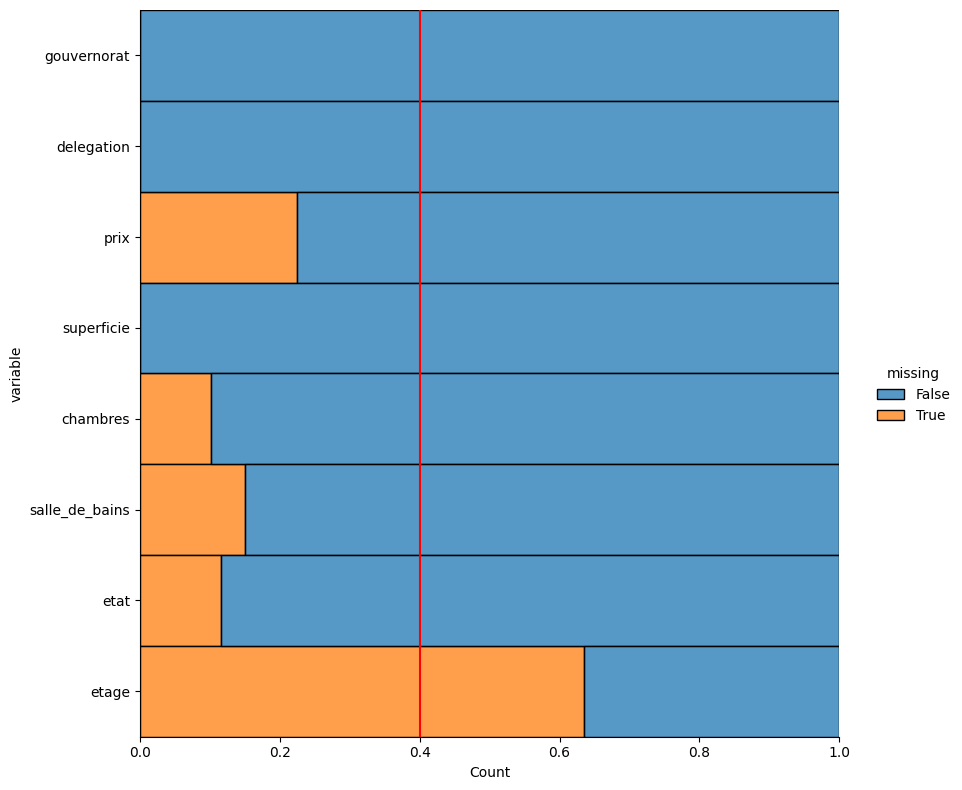

In [55]:
sns.displot(
    data=df.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
    aspect=1.1
)

# specifying a threshold value
plt.axvline(0.4, color='r')

**scatter plot for price**

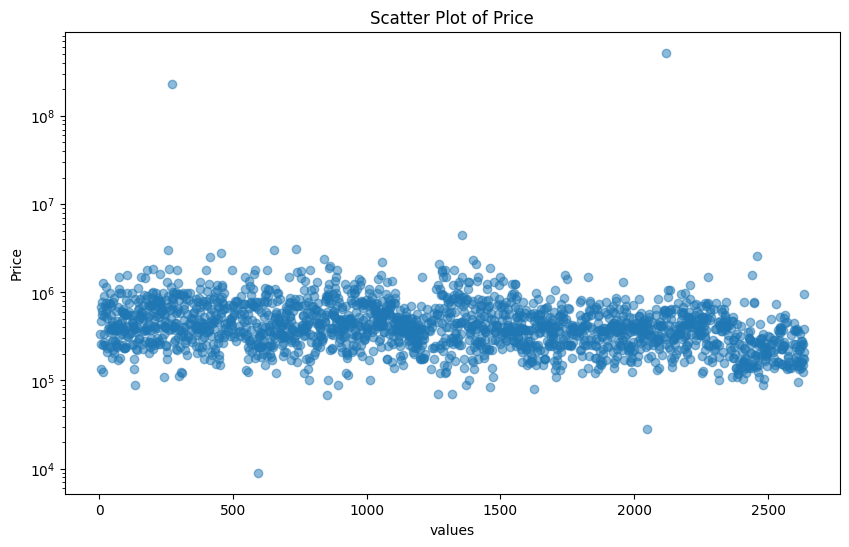

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df['prix'])), df['prix'], alpha=0.5)
plt.yscale('log')
plt.xlabel('values')
plt.ylabel('Price')
plt.title('Scatter Plot of Price')
plt.show()


**histogram of superficie**

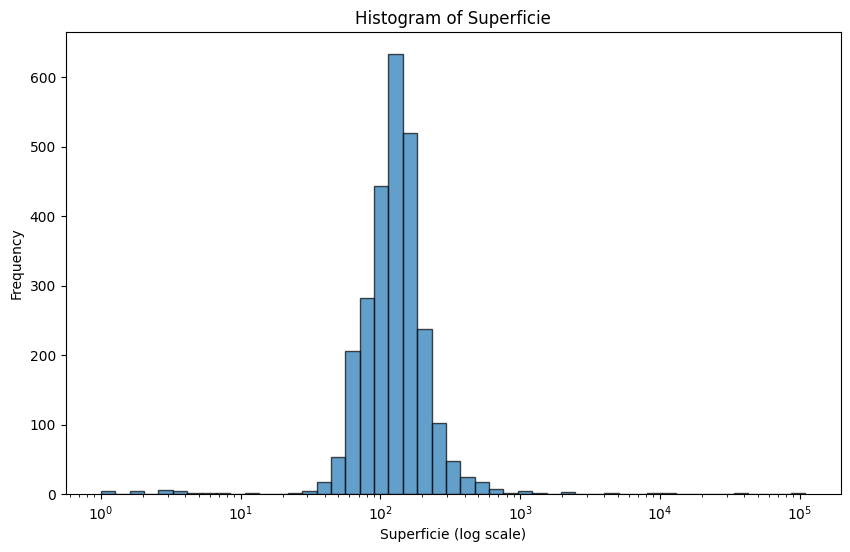

In [57]:
data = df['superficie'] 
bins = np.logspace(np.log10(data.min()), np.log10(data.max()), 50)

plt.figure(figsize=(10, 6))
plt.hist(data, bins=bins, edgecolor='k', alpha=0.7)
plt.xscale('log')
plt.xlabel('Superficie (log scale)')
plt.ylabel('Frequency')
plt.title('Histogram of Superficie')
plt.show()


**gouvernorat distribution pie**

In [67]:
print(df.gouvernorat.unique()) 
count = []
for gouv in df.gouvernorat.unique():
    print(gouv, len(df[df.gouvernorat == gouv]))
    count.append(len(df[df.gouvernorat == gouv]))

['tunis' 'ariana' 'ben-arous' 'la-manouba']
tunis 1426
ariana 936
ben-arous 209
la-manouba 66


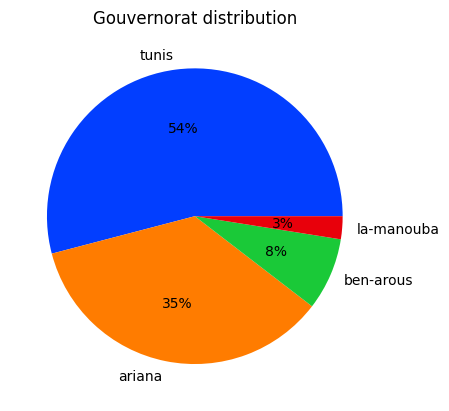

In [68]:
# gouvernorat distribution pie
keys = [i for i in df.gouvernorat.unique()] 

# define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 

# plotting data on chart 

plt.pie(count, labels=keys, colors=palette_color, autopct='%.0f%%') 
plt.title('Gouvernorat distribution')
# displaying chart 
plt.show() 


**delegation distribution pie**

In [63]:
print(df.delegation.unique()) 
count = []
for deleg in df.delegation.unique():
    print(deleg, len(df[df.delegation == deleg]))
    count.append(len(df[df.delegation == deleg]))

['Les Jardins de Carthage à Le Kram' 'Aouina à La Marsa'
 'Ain Zaghouan Nord à La Marsa' 'Tunis' 'La Marsa'
 'El Manar 2 à El Menzah' 'Sidi Daoued à La Marsa' 'Gammarth à La Marsa'
 'Bhar Lazreg à La Marsa' 'La Marsa à La Marsa'
 'Gammarth Supérieur à La Marsa' 'Le Bardo à Le Bardo'
 'Mutuelle Ville à El Menzah' 'Carthage à Carthage'
 'El Menzah 9 à El Menzah' 'Les Berges Du Lac 2 à La Marsa'
 'Cité El Khalil à La Marsa' 'Centre Urbain Nord à Cité El Khadra'
 'La Goulette Casino à La Goulette' 'Les Berges Du Lac 1 à La Marsa'
 'Cité Olympique à Cité El Khadra' 'La Goulette à La Goulette'
 'Bab Saadoun à Tunis' 'Bab Bhar à Tunis' 'Gammarth Village à La Marsa'
 'Le Kram à Le Kram' 'El Omrane à El Omrane' 'El Hrairia à El Hrairia'
 'Cité Ubn Khaldoun à El Omrane Superieur' 'Carthage Byrsa à Carthage'
 'El Ouardia à El Ouardia' 'Ain Zaghouan Sud à La Marsa'
 'Habib Thameur à Tunis' 'La Perle du Lac 1 à La Marsa'
 'Sidi Bousaid à Carthage' 'El Manar 1 à El Menzah'
 'Bellevue à El Ouardia' '

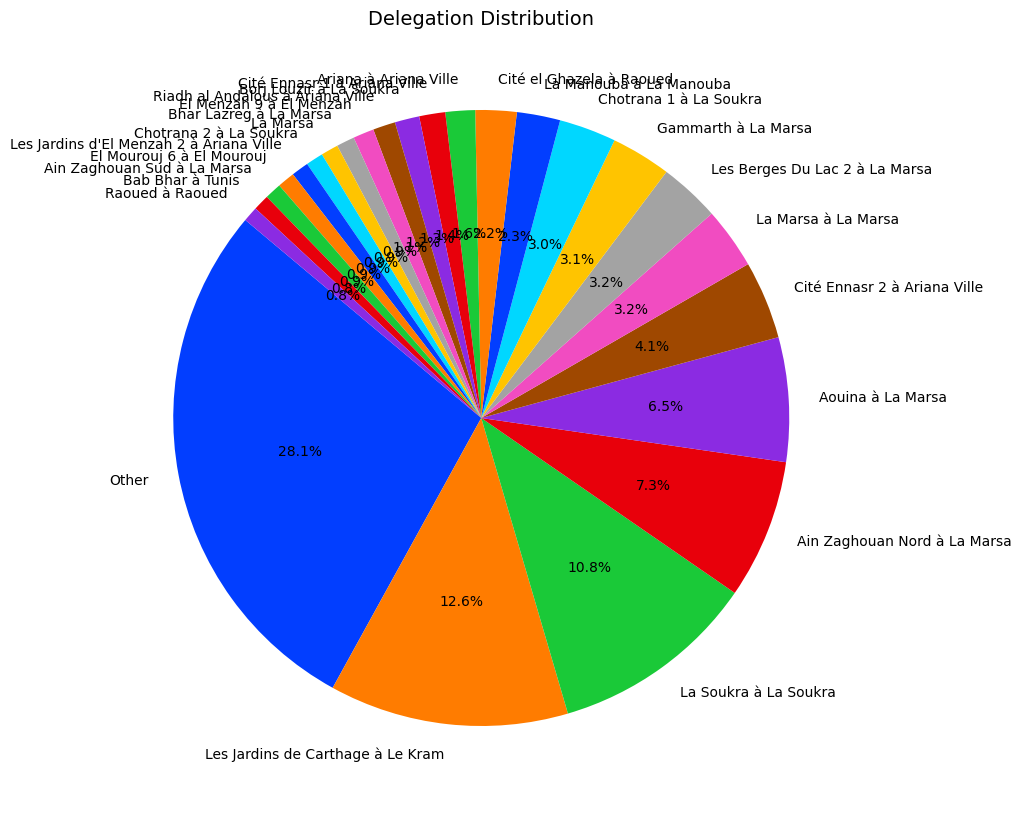

In [65]:
df['delegation_grouped'] = df['delegation'].apply(lambda x: x if df['delegation'].value_counts()[x] > 20 else 'Other')
grouped_count = df['delegation_grouped'].value_counts()

palette_color = sns.color_palette('bright')

# Increase figure size for readability
plt.figure(figsize=(10, 10))

# Plot pie chart
plt.pie(grouped_count, labels=grouped_count.index, colors=palette_color, autopct='%1.1f%%',
        startangle=140, textprops={'fontsize': 10})
plt.title('Delegation Distribution', fontsize=14)

# Display chart
plt.show()


**correlation between numerical features**

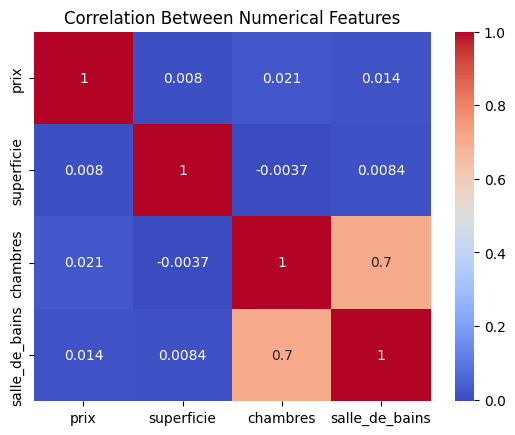

In [77]:
# Correlation matrix for numerical features
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr(method='pearson')  # or 'spearman' for rank-based correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()
